# GAME INSIGHTS  PROJECT

                                                #### Anıl Özdemir

I will apply a several discovery method to come up with insights based on the data you supplied me.I am going to decide whether the game should be launched or not while  finding the list of metrics you are expected to me to calculate. 

**Contents**

[1. Dataset Loading and Importing Necessary Libraries & Modules](#1)    
[2. Connection to Database](#2)    
&nbsp;&nbsp;&nbsp;&nbsp;[2.1 Read a SQL Query out of your database and into a Pandas Dataframe](#2.1)    
  [3. Cohorted Daily metrics ](#3)        
&nbsp;&nbsp;&nbsp;&nbsp;[3.1 Daily / Monthly User Activity](#3.1)    
&nbsp;&nbsp;&nbsp;&nbsp;[3.2 Installs & Organic vs. Paid User Acquisition](#3.2)    
&nbsp;&nbsp;&nbsp;&nbsp;[3.3 Retention](#3.3)    
  [4. Game Metrics](#4)        
&nbsp;&nbsp;&nbsp;&nbsp;[4.1 Average Game Duration](#4.1)     
&nbsp;&nbsp;&nbsp;&nbsp;[4.2 Average Game Score](#4.2)     
&nbsp;&nbsp;&nbsp;&nbsp;[4.3 Session per User](#4.3)       
&nbsp;&nbsp;&nbsp;&nbsp;[4.4 Games per User](#4.4)       
&nbsp;&nbsp;&nbsp;&nbsp;[4.5 Average Session Duration](#4.5)       
&nbsp;&nbsp;&nbsp;&nbsp;[4.6 Percentage of User that Finished Tutorial ](#4.6) 
  [5. Analysis of Number of Guns Registered Per State](#5)        
      

<br><br>

## <a id="1">1.  Dataset Loading and Importing Necessary libraries & Modules </a>

As the first step, let me import the necessery libraries and , load the dataset. 

In [1]:
import pandas as pd  # module for data manipulation and analysis
from __future__ import division # module for fancy printing
import numpy as np # module for high-level mathematical functions 
import sqlite3 as sq  #Explain later.
from datetime import datetime # module for manipulating dates and times 
import plotly.graph_objs as go # for visualization
import calendar
from plotly.offline import init_notebook_mode, iplot #for visualization
init_notebook_mode(connected=True)
from IPython.display import display_html # for display
import matplotlib.pyplot as plt # for visualization
import seaborn as sns # for visualization
sns.set_style("darkgrid")
import warnings # for ignore unnecessery warnings.
warnings.simplefilter('ignore')
%matplotlib inline

Importing- Data and .pynb file must be share common directory to using pd.read_csv with only name parameter.

In [2]:
#read the CSVs

start_info = pd.read_csv('start.csv')
end_info=pd.read_csv("endgame.csv")
install_info=pd.read_csv("install.csv")
log_info=pd.read_csv("login.csv")
tutor_info=pd.read_csv("tutorial.csv")



<br><br>

## <a id="2">2.  Database Connection </a>

### SQLite

SQLite which is a C library that supports a lightweight disk-based database that doesn’t need a separate server process and allows accessing the database using a nonstandard variant of the SQL query language. Idea behind SQLite that it’s serverless. It doesn’t require a server to run.
In this work, I used module called sqlite3 which provide integration between SQLlite and  Python.
We can perform any operation on a SQLite database via  sqlite3  is to open a connection to an SQLite database file.
More information can be found under following [link](https://docs.python.org/2/library/sqlite3.html).

The below Python code enables us to connect to an existing database using connection "objectconn".If the database does not exist, then it will be create a Any_Database_Name.db file in the current directory. 

In [3]:
#connect to a database
connection = sq.connect("My.db_python_gram") #if the db does not exist, this creates a Any_Database_Name.db file in the current directory
try:
    start_info.to_sql('start_table', connection)
    end_info.to_sql('end_table', connection)
    install_info.to_sql('install_table', connection)
    log_info.to_sql('login_table', connection)
    tutor_info.to_sql('tutorial_table', connection)
except sq.OperationalError as e:
    print('sqlite error:', e.args[0])  # table companies already exists
    
    

<br><br>
### <a id="2.1">2.1 Read a SQL Query out of your database and into a Pandas Dataframe</a>
By using pandas.read_sql function we can read SQL query or database table into a DataFrame. 

In [4]:
#read a SQL Query out of your database and into a pandas dataframe
query = 'SELECT * from start_table' #
start_info = pd.read_sql(query, connection)

In [5]:
start_info.head(5)

,index,event_id,uid,ts,dt,s_index,s_time,game_index,xp,xp_level,type
0,0,22432c15-8977-1bb8-9df8-80a411c245ff,2581,1488635080,2017-03-04,62,851,138,695,8,newg
1,1,36866492-5a64-f7a5-794d-3790a0c38953,316,1487952786,2017-02-24,1,86,1,0,1,midg
2,2,89d13450-0566-d554-2ffd-8a3f4ff0db89,297,1489441403,2017-03-13,35,1215,129,220,7,midg
3,3,5eb3ad11-4eb9-9369-738d-43f143c844e3,1070,1488592543,2017-03-04,13,1414,38,29,6,midg
4,4,cfb62ac5-7d09-d2d1-943d-04d25255deb6,1967,1490550180,2017-03-26,3,163,3,2,1,midg


In [6]:
query = 'SELECT * from end_table' #
end_info = pd.read_sql(query, connection)


In [7]:
end_info.head(3)

,index,event_id,uid,ts,dt,s_index,s_time,game_index,duration,score,...,chain_count,combo_count,max_tile_seen,merge_count,moves_count,rotate_count,upgrade_tiles,xp,xp_gained,xp_level
0,0,52b83e6e-eae1-9c0b-ce33-31b809a26393,400,1489420016,13/03/17,64,3830,405,240.3142,1362,...,3,10,7,51,89,79,6,1629,10,9
1,1,2504ac73-8e70-e0c7-cb83-5dd9accddbe3,1885,1487730856,22/02/17,1,619,3,138.4912,307,...,0,2,6,25,52,30,0,7,0,1
2,2,7578f4ed-1f1f-6538-ee55-1cd07c665230,1987,1488338552,01/03/17,8,359,16,153.2273,611,...,2,4,7,28,53,34,6,13,8,4


In [8]:
query = 'SELECT * from install_table' #
install_info = pd.read_sql(query, connection)


In [9]:
install_info.head(4)

,index,event_id,uid,ts,dt,device,tz,is_organic
0,0,41f5534e-d523-2062-be53-d55c69157824,747,1488070616,2017-02-26,"iPad3,3",-08:00:00,0
1,1,cec2d96c-4dce-3099-6f78-4b3841170e54,1299,1487940482,2017-02-24,"iPad4,1",-05:00:00,0
2,2,ad4fb0ea-6949-e253-0e6f-7fdef5369c5d,2439,1487904064,2017-02-24,"iPhone7,1",-08:00:00,0
3,3,88539642-a518-3156-6efb-80897686c99f,2099,1487788550,2017-02-22,"iPad6,7",01:00:00,0


In [10]:
query = 'SELECT * from login_table' #
log_info = pd.read_sql(query, connection)

In [11]:
log_info.head(5)

,index,event_id,ts,dt,uid,s_index
0,0,11ac5826-45b2-2457-4015-1c6d9763ca67,1488799625,2017-03-06,400,36
1,1,c20e8b35-cb2f-3f19-19e8-b3fbdd8460cf,1488248772,2017-02-28,1080,20
2,2,c3921e11-9493-fc9b-d0c3-19673f734973,1488050711,2017-02-25,1485,1
3,3,fbe1a668-3b24-6c3d-b217-a07a4f8e391e,1490273605,2017-03-23,473,32
4,4,d06d8d64-b95c-b692-8e5f-823610ed57c3,1487892525,2017-02-23,1906,2


In [12]:
query = 'SELECT * from tutorial_table' #
tutorial_info = pd.read_sql(query, connection)

In [13]:
tutorial_info.head(3)

,index,event_id,ts,dt,uid,s_index,s_time,game_index,step
0,0,fcd7a8bd-921e-5878-8a50-1e7f88b46d50,1488007754,2017-02-25,1356,1,93,1,8
1,1,a3fb3bdc-73bd-a1b6-760c-23afbafceacf,1487946568,2017-02-24,1259,1,143,1,5
2,2,f44c7c86-2485-4d3e-8f55-a42c2855ac0d,1488043101,2017-02-25,292,1,295,1,6


<br><br>

## <a id="3">3.  Cohorted Daily Metrics </a>

### <a id="3.1">3.1 Daily/Monthly Active Users</a>

DAU is the number of unique users that start at least one session in app on any given day. The real problem is with measuring “active users.” Active is a functionally ambiguous word. It is whatever we want it to be.

My first definition of being active is "Being login into the game" and my second definiton is to start at least one game after logged in. I will start with numbers from  "user that login the game" and compare it with numbers from the users that "at least start one a game". Aim of this to answer the question whether there are users who do not play games despite logging into the game.

The danger of defining your “active user” by a minimal metric like logins is that you’re just seeing a reflection of press and hype. It doesn’t measure real usage of your app.

Monthly Active User metrics is basically aggregation of Daily User Activity metrics.


In [14]:
query = 'SELECT DISTINCT uid ,  dt  from login_table  ORDER by dt' # Because we need unique users for each days.
a = pd.read_sql(query, connection)
a.head(5)


,uid,dt
0,706,2017-02-14
1,324,2017-02-14
2,2550,2017-02-14
3,1067,2017-02-15
4,1998,2017-02-15


In [15]:
#Below query returns distinct uid's at least one login the game.

query = 'SELECT COUNT(DISTINCT uid) as users_login_game,  dt  from login_table GROUP BY dt  ORDER by dt' # Because we need unique users for each days.
log_day = pd.read_sql(query, connection)
log_day.head(3)

,users_login_game,dt
0,3,2017-02-14
1,5,2017-02-15
2,3,2017-02-16


In [16]:
# I will add below features to use in visuazaliton, make horizontal axis to be function of time.
log_day['date'] = pd.to_datetime(log_day['dt'])
log_day['month'] = log_day['date'].dt.month
log_day['monthday'] = log_day['date'].dt.day
log_day['weekday'] = log_day['date'].dt.weekday # Which day is it ?

log_day.head(3)

,users_login_game,dt,date,month,monthday,weekday
0,3,2017-02-14,2017-02-14,2,14,1
1,5,2017-02-15,2017-02-15,2,15,2
2,3,2017-02-16,2017-02-16,2,16,3


## Let's Visualize it!

In [17]:
trace1 = go.Bar(x=log_day['dt'], y=log_day['users_login_game'], opacity=0.85, name="Monthly Active Users", marker=dict(color ='#000000'))
layout = dict(height=800, title='Daily Unique User Login Numbers', legend=dict(orientation="h"));
fig = go.Figure(data=[trace1], layout=layout);
iplot(fig)

In [18]:
# We calculated DAU with login now calculate MAU
log_day.head(4)



,users_login_game,dt,date,month,monthday,weekday
0,3,2017-02-14,2017-02-14,2,14,1
1,5,2017-02-15,2017-02-15,2,15,2
2,3,2017-02-16,2017-02-16,2,16,3
3,2,2017-02-18,2017-02-18,2,18,5


## Monthly User Activity by Login

In [19]:
dummy = log_day.groupby(['month']).agg({'month' : 'count'}).rename(columns={'month': 'm_c'}).reset_index()
agg = dummy.groupby(['month']).agg({'m_c' : 'mean'})
x2 = agg.index.tolist()
y2 = agg.m_c.tolist()
dum = {}

for a,b in zip(x2, y2):
    dum[a] = b
horz = [calendar.month_abbr[int(x)] for x in sorted(x2)]

trace1 = go.Bar(x=horz, y=log_day.groupby(['month'])['users_login_game'].sum(), opacity=0.75, name="month", marker=dict(color='rgba(100, 100, 10, 0.6)'))
layout = dict(height=400, title='Monthly Active Users (According to the Login)', legend=dict(orientation="h"));
fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)

One thing to take attention is , We have approximately 15 day for February, 31 day for March, and 14 day for April. Therefore, if we put aside March and compare February to April, it is impossible not to notice the sharp fall in the User Activity.

Now repeat same process for finding users that at least start a game.

In [20]:

query = 'SELECT COUNT(DISTINCT uid) as users_start_game ,  dt  from start_table GROUP BY dt  ORDER by dt'
start_day = pd.read_sql(query, connection)
start_day.head(3)

,users_start_game,dt
0,3,2017-02-14
1,2,2017-02-15
2,3,2017-02-16


In [21]:
query = 'SELECT COUNT(DISTINCT uid) as users_end_game ,  dt  from end_table GROUP BY dt  ORDER by dt' 
end_day = pd.read_sql(query, connection)
end_day.head(3)

,users_end_game,dt
0,314,01/03/17
1,78,01/04/17
2,281,02/03/17


In [22]:

# Create some additional features
start_day['date'] = pd.to_datetime(start_day['dt'])
start_day['month'] = start_day['date'].dt.month
start_day['monthday'] = start_day['date'].dt.day
start_day['weekday'] = start_day['date'].dt.weekday # Which day is it ?
#####################################################
end_day['date'] = pd.to_datetime(end_day['dt'])
end_day['month'] = end_day['date'].dt.month
end_day['monthday'] = end_day['date'].dt.day
end_day['weekday'] = end_day['date'].dt.weekday 

trace1 = go.Bar(x=start_day['dt'], y=start_day['users_start_game'], opacity=0.85, name="Start", marker=dict(color='#000000'))
trace2 =go.Bar(x=log_day['dt'], y=log_day['users_login_game'], opacity=0.85, name="Login", marker=dict(color='#CB4335'))
layout = dict(height=1000, title='Daily User Activity', legend=dict(orientation="h"));
fig = go.Figure(data=[trace1,trace2], layout=layout);
iplot(fig)


 Numbers seems very close. Difference between login and start game numbers  represent the users that login to the application but not playing any round in this game. Let's find its numbers
 


In [23]:
a=start_day[['users_start_game','date']]
b=log_day[['users_login_game','date']]

#print("Mean Difference between Login a game and Start a game numbers :" ,b.mean()-a.mean())
dum=pd.merge(a,b[['date','users_login_game']],on='date', how='left').head(10)
dum['Difference']=dum['users_login_game'] - dum['users_start_game']
dum.head(10)

,users_start_game,date,users_login_game,Difference
0,3,2017-02-14,3,0
1,2,2017-02-15,5,3
2,3,2017-02-16,3,0
3,13,2017-02-20,13,0
4,121,2017-02-21,123,2
5,327,2017-02-22,331,4
6,415,2017-02-23,422,7
7,576,2017-02-24,590,14
8,774,2017-02-25,785,11
9,791,2017-02-26,809,18


In [24]:
print("Mean number of users that login the game but not playing any round is :",dum['Difference'].mean())

Mean number of users that login the game but not playing any round is : 5.9


<br>
### <a id="3.2">3.2 Organic vs Paid User Acquisition</a>
General overview about installing organic or with paid


In [25]:

query = 'SELECT  count(*) ,Is_organic from install_table group by Is_organic' # Because we need unique users for each days.
inst = pd.read_sql(query, connection)
inst

,count(*),is_organic
0,2196,0
1,362,1


In [26]:
trace1 = go.Bar(x=['Paid','Organic'], y= inst['count(*)'], opacity=0.75, name="month", marker=dict(color='rgba(100, 20, 10, 0.6)'))
layout = dict(height=400, title='Monthly-based Organic vs Paid User Acquisition', legend=dict(orientation="h"));
fig = go.Figure(data=[trace1], layout=layout)
iplot(fig, filename='stacked-bar')

In [27]:
from IPython.display import display_html #Only for fancy showing
def mult_disp(*args):
    html_str=''
    for arg in args:
        html_str+=arg.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)
    
query= 'SELECT  count(*) as userCount,dt ,Is_organic from install_table where is_organic=0 group by dt' 
query2= 'SELECT  count(*) as userCount,dt ,Is_organic from install_table where is_organic=1 group by dt' 
inst_day0 = pd.read_sql(query, connection)
inst_day1 =pd.read_sql(query2, connection)
mult_disp(inst_day0,inst_day1)


,userCount,dt,is_organic
0,8,2017-02-20,0
1,103,2017-02-21,0
2,283,2017-02-22,0
3,291,2017-02-23,0
4,386,2017-02-24,0
5,470,2017-02-25,0
6,415,2017-02-26,0
7,178,2017-02-27,0
8,27,2017-02-28,0
9,10,2017-03-01,0


In [28]:
inst_day0['date'] = pd.to_datetime(inst_day0['dt'])
inst_day1['date'] = pd.to_datetime(inst_day1['dt'])

trace1 = go.Scatter(x = inst_day0.date, y = inst_day0['userCount'], name='Paid', mode = "lines", marker = dict(color = '#c5d9f9'))
trace2 = go.Scatter(x = inst_day1.date, y = inst_day1['userCount'], name="Organic", mode = "lines", marker = dict(color = '#ff9f87'))

data = [trace1, trace2]
layout = dict(height=750, title = 'Daily Organic vs Paid User Acquisition', legend=dict(orientation="h", x=-.01, y=1), xaxis= dict(title='Date Time', ticklen= 1))
fig = dict(data = data, layout = layout)
iplot(fig)


<br>
### <a id="3.3">3.3 Retention</a>

For calculating retention, I followed two different way. First Classical Retention and Range Retention as a second.

### Classical Retention

It is # of users who use/play/login the app the nth day after day 0 /# of users who first used the app on day 0 



![](https://www.braze.com/wp-content/uploads/2016/10/AB1016_BLOG_USER-RETENTION_7_826x250R.jpg)

Then, the first step is to identify the original pool of customers:

In [29]:
query = 'SELECT  * from login_table group by uid' 
ret1 = pd.read_sql(query, connection)

print("Total number of unique users that has at least logged once between 14 February to 14 April :",  len(ret1))

Total number of unique users that has at least logged once between 14 February to 14 April : 2710


Let's find the first-initial login date of users, I  can do this by looking install table but there can be users that install but not login.

In [30]:
#Purpose of this query is find the First_login date for entire user pool in the duration of 14 February to 14 April.
query = 'SELECT uid,min(dt) as First_Login_Date from login_table   group by uid  ' 
ret1 = pd.read_sql(query, connection)
ret1.head(10)

,uid,First_Login_Date
0,1,2017-02-25
1,2,2017-02-24
2,3,2017-02-25
3,4,2017-02-21
4,5,2017-02-26
5,6,2017-02-22
6,7,2017-02-24
7,8,2017-02-23
8,9,2017-02-24
9,10,2017-02-27


Tricky point in here is, when we join the login table by itself under the uid primary key , we have two different date , lets name  them as a  A.date and B.date. If we know the minimum A.date this means  that i have the information of first login time  of that particular user's life time, as well as the other login date's as a second column

After necessary deletions table become first date column as a First login date and second is a any after login date.

Now we can find the difference between two dates using  SQLite3's julianday function and figure out that this difference equals 1 ,3 5, 10, 30 etc.
If particular query returns row under any difference size, this means that this user return the game after 1 ,3 5, 10, etc day later.

So algorithm became following for retention:

Find the user numbers that  return after 1 or 3 ,5 ,10, 20,30 day.   
Divide the this number to the numbers of unique users that first login  in that range.
if we calculate the 10 day retention

10th retention is :  # of users return after 10 that after their first login / Total user until  4 April. ( Not 14 April because we have to ignore them , they do not have chance to return after 10 day there is not any data for them.)
                   


This was for the classical retention.


    

In [31]:
#Purpose of this query is find the First_login date for entire user pool in the duration of 14 February to 14 April
query = 'SELECT A.uid, min(A.dt) as First_Date from login_table as A INNER JOIN login_table as B on A.uid=B.uid   group by A.uid   ' 
ret1 = pd.read_sql(query, connection)
ret1.head(10)

,uid,First_Date
0,1,2017-02-25
1,2,2017-02-24
2,3,2017-02-25
3,4,2017-02-21
4,5,2017-02-26
5,6,2017-02-22
6,7,2017-02-24
7,8,2017-02-23
8,9,2017-02-24
9,10,2017-02-27


### Classical Retention Calculation Phase

Two query required for calculation of n'th retention. On every step, first query finds the # of users that logged first time  in corresponding  range and second one is the check whether they are logged again after n'Th day

In [32]:
#day1 

query1 = 'SELECT A.uid , min(A.dt) as First_Date from login_table as A INNER JOIN login_table as B on A.uid=B.uid where A.dt <= "2017-04-14" group by A.uid ' 
tot = pd.read_sql(query1, connection)
print("Total new unique users between (2017/02/14-2017/04/14 ): ", len(tot))
len(tot)

query2 = 'SELECT C.uid  from login_table as C INNER JOIN login_table as B on C.uid=B.uid where C.dt <= "2017-04-14" and C.uid in (select X.uid from (select A.uid, min(A.ts),A.dt as First_date from login_table as A GROUP BY A.uid) as X INNER JOIN login_table B on X.uid=B.uid where X.First_date != B.dt AND (SELECT julianday(B.dt) - julianday(X.First_date)=1) order by First_date ASC) group by C.uid ' 
ret1 = pd.read_sql(query2, connection)

print("# of Users that return the game after 1 day :", len(ret1))
print("Retention for 1st day is :", len(ret1)/len(tot))
#############################################################################3
query3 = 'SELECT A.uid , min(A.dt) as First_Date from login_table as A INNER JOIN login_table as B on A.uid=B.uid where A.dt <= "2017-04-11" group by A.uid ' 
tot3 = pd.read_sql(query3, connection)
print("Total new unique users between (2017/02/14-2017/04/11 ): ", len(tot3))
len(tot3)

query4 = 'SELECT C.uid  from login_table as C INNER JOIN login_table as B on C.uid=B.uid where C.dt <= "2017-04-11" and C.uid in (select X.uid from (select A.uid, min(A.ts),A.dt as First_date from login_table as A GROUP BY A.uid) as X INNER JOIN login_table B on X.uid=B.uid where X.First_date != B.dt AND (SELECT julianday(B.dt) - julianday(X.First_date)=3) order by First_date ASC) group by C.uid ' 
ret3 = pd.read_sql(query4, connection)

print("# of Users that return the game after 3 day :", len(ret3))
print("Retention for 3rd day is :", len(ret3)/len(tot3))
##############################################################################

query5 = 'SELECT A.uid , min(A.dt) as First_Date from login_table as A INNER JOIN login_table as B on A.uid=B.uid where A.dt <= "2017-04-07" group by A.uid ' 
tot7 = pd.read_sql(query5, connection)
print("Total new unique users between (2017/02/14-2017/04/07 ): ", len(tot7))
len(tot3)

query6 = 'SELECT C.uid  from login_table as C INNER JOIN login_table as B on C.uid=B.uid where C.dt <= "2017-04-07" and C.uid in (select X.uid from (select A.uid, min(A.ts),A.dt as First_date from login_table as A GROUP BY A.uid) as X INNER JOIN login_table B on X.uid=B.uid where X.First_date != B.dt AND (SELECT julianday(B.dt) - julianday(X.First_date)=7) order by First_date ASC) group by C.uid' 
ret7 = pd.read_sql(query6, connection)

print("# of Users that return the game after 7 day :", len(ret7))
print("Retention for 7st day is :", len(ret7)/len(tot7))
#################################################################################
query7 = 'SELECT A.uid , min(A.dt) as First_Date from login_table as A INNER JOIN login_table as B on A.uid=B.uid where A.dt <= "2017-04-04" group by A.uid ' 
tot10 = pd.read_sql(query7, connection)
print("Total new unique users between (2017/02/14-2017/04/04 ): ", len(tot10))
len(tot10)

query8 = 'SELECT C.uid  from login_table as C INNER JOIN login_table as B on C.uid=B.uid where C.dt <= "2017-04-04" and C.uid in (select X.uid from (select A.uid, min(A.ts),A.dt as First_date from login_table as A GROUP BY A.uid) as X INNER JOIN login_table B on X.uid=B.uid where X.First_date != B.dt AND (SELECT julianday(B.dt) - julianday(X.First_date)=10) order by First_date ASC) group by C.uid' 
ret10 = pd.read_sql(query8, connection)

print("# of Users that return the game after 10 day :", len(ret10))
print("Retention for 10th day is :", len(ret10)/len(tot10))
#################################################################################
query9 = 'SELECT A.uid , min(A.dt) as First_Date from login_table as A INNER JOIN login_table as B on A.uid=B.uid where A.dt <= "2017-03-30" group by A.uid ' 
tot15 = pd.read_sql(query9, connection)
print("Total new unique users between (2017/02/14-2017/03/30 ): ", len(tot15))
len(tot15)

query10 = 'SELECT C.uid  from login_table as C INNER JOIN login_table as B on C.uid=B.uid where C.dt <= "2017-03-30" and C.uid in (select X.uid from (select A.uid, min(A.ts),A.dt as First_date from login_table as A GROUP BY A.uid) as X INNER JOIN login_table B on X.uid=B.uid where X.First_date != B.dt AND (SELECT julianday(B.dt) - julianday(X.First_date)=15) order by First_date ASC) group by C.uid' 
ret15 = pd.read_sql(query10, connection)

print("# of Users that return the game after 15 day :", len(ret15))
print("Retention for 15th day is :", len(ret15)/len(tot15))
#################################################################################
query10 = 'SELECT A.uid , min(A.dt) as First_Date from login_table as A INNER JOIN login_table as B on A.uid=B.uid where A.dt <= "2017-03-14" group by A.uid ' 
tot30 = pd.read_sql(query10, connection)
print("Total new unique users between (2017/02/14-2017/03/14 ): ", len(tot30))

query11 = 'SELECT C.uid  from login_table as C INNER JOIN login_table as B on C.uid=B.uid where C.dt <= "2017-03-14" and C.uid in (select X.uid from (select A.uid, min(A.ts),A.dt as First_date from login_table as A GROUP BY A.uid) as X INNER JOIN login_table B on X.uid=B.uid where X.First_date != B.dt AND (SELECT julianday(B.dt) - julianday(X.First_date)=30) order by First_date ASC) group by C.uid' 
ret30 = pd.read_sql(query11, connection)

print("# of Users that return the game after 30 day :", len(ret30))
print("Retention for 30th day is :", len(ret30)/len(tot30))

#################################################################################
query11 = 'SELECT A.uid , min(A.dt) as First_Date from login_table as A INNER JOIN login_table as B on A.uid=B.uid where A.dt <= "2017-02-28" group by A.uid ' 
tot45 = pd.read_sql(query11, connection)
print("Total new unique users between (2017/02/14-2017/02/28 ): ", len(tot45))

query12 = 'SELECT C.uid  from login_table as C INNER JOIN login_table as B on C.uid=B.uid where C.dt <= "2017-02-28" and C.uid in (select X.uid from (select A.uid, min(A.ts),A.dt as First_date from login_table as A GROUP BY A.uid) as X INNER JOIN login_table B on X.uid=B.uid where X.First_date != B.dt AND (SELECT julianday(B.dt) - julianday(X.First_date)=45) order by First_date ASC) group by C.uid' 
ret45 = pd.read_sql(query12, connection)

print("# of Users that return the game after 45 day :", len(ret45))
print("Retention for 45th day is :", len(ret45)/len(tot45))

Total new unique users between (2017/02/14-2017/04/14 ):  2710
# of Users that return the game after 1 day : 790
Retention for 1st day is : 0.2915129151291513
Total new unique users between (2017/02/14-2017/04/11 ):  2707
# of Users that return the game after 3 day : 412
Retention for 3rd day is : 0.15219800517177687
Total new unique users between (2017/02/14-2017/04/07 ):  2701
# of Users that return the game after 7 day : 236
Retention for 7st day is : 0.08737504627915586
Total new unique users between (2017/02/14-2017/04/04 ):  2697
# of Users that return the game after 10 day : 165
Retention for 10th day is : 0.06117908787541713
Total new unique users between (2017/02/14-2017/03/30 ):  2688
# of Users that return the game after 15 day : 140
Retention for 15th day is : 0.052083333333333336
Total new unique users between (2017/02/14-2017/03/14 ):  2656
# of Users that return the game after 30 day : 86
Retention for 30th day is : 0.03237951807228916
Total new unique users between (201

In [33]:

ret=[len(ret1)/len(tot),len(ret3)/len(tot3),len(ret7)/len(tot7),len(ret10)/len(tot10),len(ret15)/len(tot15),len(ret30)/len(tot30),len(ret45)/len(tot45)]


d = {'Retention': np.array(ret),  'Day': [1,3,7,10,15,30,45]}
dummy = pd.DataFrame(data=d)


trace1 = go.Scatter(x = dummy['Day'], y = dummy['Retention']*100, name='Week1', mode = "lines", marker = dict(color = '#598AC6'))


data = [trace1]
layout = dict(height=750, title = 'Classic Retention (%)', legend=dict(orientation="h", x=-.01, y=1), xaxis= dict(title=" n'th Day Later ", ticklen= 1))
fig = dict(data = data, layout = layout)
iplot(fig)


<br>

### Range Retention
<br>

### Important Note: This section has  an cumulative error due to logical expressions in datetime parts of queries. The numbers from First week is correct however 2,3,4,5 is not correct. You can ignore it. Due to figure out my mistake very lately , there is no chance to fix it.

![](https://www.braze.com/wp-content/uploads/2016/10/AB1016_BLOG_USER-RETENTION_8_826x250R.jpg)





For Range Retention, I followed another way. I calculated the users that logged first  in ( first week (14 February to 21 February) , second week ( 21 February to 28 February) , third week, forth week and fifth week).

Then,for each week of users , There are different pools and different total number exist.
Then, I calculate retention for each different week then compare it.

Let's illustrate it: 

There are 140 new users  first logged in the game (or installed it) in the range of 14 February to 21 February (First Week).
Then i calculated the their first day retention , for example if someone install the game in 16 February, i check whether he/She is enterred the game in 17 February and so on.

Then figure out that users that belongs in first week pool, approximately 31% of them return in first day. Then retention becomes 31% for them.

For every week pool i calculated another retentions.


In [34]:
query = 'select * from (select A.uid, min(A.ts),A.dt as First_date from login_table as A GROUP BY A.uid) as X INNER JOIN login_table B on X.uid=B.uid where X.First_date != B.dt AND (SELECT julianday(B.dt) - julianday(X.First_date)=1) order by First_date ASC;' 
ret1 = pd.read_sql(query, connection)
print("Above query returns all the unique users that Login the game on First day")
ret1.head(5)


Above query returns all the unique users that Login the game on First day


,uid,min(A.ts),First_date,index,event_id,ts,dt,uid,s_index
0,324,1487087785,2017-02-14,12196,bf4ac84d-233e-5e01-683b-4842f57153e0,1487183150,2017-02-15,324,6
1,1998,1487173671,2017-02-15,18287,cf9f6fab-683e-abfb-5268-2ddbbf3ed86e,1487235539,2017-02-16,1998,7
2,1998,1487173671,2017-02-15,18776,6d6622d1-1479-d262-a2b2-f8b3df80aede,1487235539,2017-02-16,1998,8
3,1260,1487633183,2017-02-20,1135,00294ac6-9f2b-2893-e93e-6f848c8f0824,1487653510,2017-02-21,1260,2
4,784,1487630148,2017-02-20,1705,d59a15da-6b3e-fd04-5973-01291e635c74,1487698857,2017-02-21,784,7


Start with Range Retention , First Calculate New users in 14-21/02 , then 22-29/02, 30/02-07/03, 08-15/03, 16-23/03 

In [35]:
# New users in (First order within 14-21/02 )
query = 'SELECT A.uid , min(A.ts),A.dt as First_Date from login_table as A INNER JOIN login_table as B on A.uid=B.uid where A.dt <= "2017-02-21" group by A.uid ' 
w1 = pd.read_sql(query, connection)
print("Total new unique users in week 1 (2017/02/14-2017/02/21 ): ", len(w1))
len(w1)

Total new unique users in week 1 (2017/02/14-2017/02/21 ):  140


140

This means there are 140 new user login in First week
First week -> 140 New user and we know their id.
Let's check  whether how many of these user login back after one day. We already find the unique users that login after their first login just search uid's in those.

In [36]:
# Below query return user n
query = 'SELECT C.uid  from login_table as C INNER JOIN login_table as B on C.uid=B.uid where C.dt <= "2017-02-21" and C.uid in (select X.uid from (select A.uid, min(A.ts),A.dt as First_date from login_table as A GROUP BY A.uid) as X INNER JOIN login_table B on X.uid=B.uid where X.First_date != B.dt AND (SELECT julianday(B.dt) - julianday(X.First_date)=1) order by First_date ASC) group by C.uid  ' 
ret1w1 = pd.read_sql(query, connection)
print("Total New Week 1 users : 140, and Users that login on First day: :" ,len(ret1w1)," Retention on First Day of Week 1 Users: ",len(ret1w1)/140)


Total New Week 1 users : 140, and Users that login on First day: : 44  Retention on First Day of Week 1 Users:  0.3142857142857143


In [37]:
# We can see 43 People logged in again in one day later.
# Now calculate 3 days later.

query = '''SELECT C.uid  
        from login_table as C INNER JOIN login_table as B on C.uid=B.uid 
        where C.dt <= "2017-02-21" and C.uid in 
        (select X.uid from (select A.uid, min(A.ts),A.dt as First_date from login_table as A 
            GROUP BY A.uid) as X INNER JOIN login_table B on X.uid=B.uid 
                where X.First_date != B.dt AND (SELECT julianday(B.dt) - julianday(X.First_date)=3)
                    order by First_date ASC) group by C.uid ''' 

ret3w1 = pd.read_sql(query, connection)
print("Total New Week 1 users : 140, and Users that login on Third day: :" ,len(ret3w1)," Retention on Third Day of Week 1 Users: ",len(ret3w1)/140)


Total New Week 1 users : 140, and Users that login on Third day: : 17  Retention on Third Day of Week 1 Users:  0.12142857142857143


In [38]:
query1 = '''SELECT C.uid  from login_table as C
            INNER JOIN login_table as B 
            on C.uid=B.uid where C.dt <= "2017-02-21" and C.uid in 
                (select X.uid from (select A.uid, min(A.ts),A.dt as First_date from login_table as A GROUP BY A.uid) as X
                INNER JOIN login_table B on X.uid=B.uid 
                where X.First_date != B.dt AND 
                (SELECT julianday(B.dt) - julianday(X.First_date)=5) 
                order by First_date ASC) group by C.uid ''' 

ret5w1 = pd.read_sql(query1, connection)
print("Total New Week 1 users : 140, and Users that login on 5th day: :" ,len(ret5w1)," Retention on 5th Day of Week 1 Users: ",len(ret5w1)/140)
ret1w1


query2 = '''SELECT C.uid  from login_table as C
            INNER JOIN login_table as B 
            on C.uid=B.uid where C.dt <= "2017-02-21" and C.uid in 
                (select X.uid from (select A.uid, min(A.ts),A.dt as First_date from login_table as A GROUP BY A.uid) as X
                INNER JOIN login_table B on X.uid=B.uid 
                where X.First_date != B.dt AND 
                (SELECT julianday(B.dt) - julianday(X.First_date)=7) 
                order by First_date ASC) group by C.uid ''' 

ret7w1 = pd.read_sql(query2, connection)
print("Total New Week 1 users : 140, and Users that login on 7th day: :" ,len(ret7w1)," Retention on 7th Day of Week 1 Users: ",len(ret7w1)/140)
ret7w1

Total New Week 1 users : 140, and Users that login on 5th day: : 13  Retention on 5th Day of Week 1 Users:  0.09285714285714286
Total New Week 1 users : 140, and Users that login on 7th day: : 7  Retention on 7th Day of Week 1 Users:  0.05


,uid
0,449
1,530
2,784
3,1807
4,2154
5,2403
6,2603


In [39]:
query = '''SELECT C.uid  from login_table as C
            INNER JOIN login_table as B 
            on C.uid=B.uid where C.dt <= "2017-02-21" and C.uid in 
                (select X.uid from (select A.uid, min(A.ts),A.dt as First_date from login_table as A GROUP BY A.uid) as X
                INNER JOIN login_table B on X.uid=B.uid 
                where X.First_date != B.dt AND 
                (SELECT julianday(B.dt) - julianday(X.First_date)=10) 
                order by First_date ASC) group by C.uid ''' 

ret10w1 = pd.read_sql(query, connection)
print("Total New Week 1 users : 140, and Users that login on Tenth day: :" ,len(ret10w1)," Retention on Tenth Day of Week 1 Users: ",len(ret7w1)/140)
ret10w1

Total New Week 1 users : 140, and Users that login on Tenth day: : 5  Retention on Tenth Day of Week 1 Users:  0.05


,uid
0,449
1,785
2,1912
3,2403
4,2743


In [40]:
query = '''SELECT C.uid  from login_table as C
            INNER JOIN login_table as B 
            on C.uid=B.uid where C.dt <= "2017-02-21" and C.uid in 
                (select X.uid from (select A.uid, min(A.ts),A.dt as First_date from login_table as A GROUP BY A.uid) as X
                INNER JOIN login_table B on X.uid=B.uid 
                where X.First_date != B.dt AND 
                (SELECT julianday(B.dt) - julianday(X.First_date)=15) 
                order by First_date ASC) group by C.uid ''' 

ret15w1 = pd.read_sql(query, connection)
print("Total New Week 1 users : 140, and Users that login on Fifteenth day: :" ,len(ret10w1)," Retention on Fifteenth Day of Week 1 Users: ",len(ret7w1)/140)
ret15w1

Total New Week 1 users : 140, and Users that login on Fifteenth day: : 5  Retention on Fifteenth Day of Week 1 Users:  0.05


,uid
0,449
1,530
2,784
3,1153
4,1636
5,1912


In [41]:
query = '''SELECT C.uid  from login_table as C
            INNER JOIN login_table as B 
            on C.uid=B.uid where C.dt <= "2017-02-21" and C.uid in 
                (select X.uid from (select A.uid, min(A.ts),A.dt as First_date from login_table as A GROUP BY A.uid) as X
                INNER JOIN login_table B on X.uid=B.uid 
                where X.First_date != B.dt AND 
                (SELECT julianday(B.dt) - julianday(X.First_date)=20) 
                order by First_date ASC) group by C.uid ''' 

ret20w1 = pd.read_sql(query, connection)
print("Total New Week 1 users : 140, and # of Users that login on 20th day: :" ,len(ret20w1)," Retention on 20th Day of Week 1 Users: ",len(ret20w1)/140)
ret20w1

query = '''SELECT C.uid  from login_table as C
            INNER JOIN login_table as B 
            on C.uid=B.uid where C.dt <= "2017-02-21" and C.uid in 
                (select X.uid from (select A.uid, min(A.ts),A.dt as First_date from login_table as A GROUP BY A.uid) as X
                INNER JOIN login_table B on X.uid=B.uid 
                where X.First_date != B.dt AND 
                (SELECT julianday(B.dt) - julianday(X.First_date)=30) 
                order by First_date ASC) group by C.uid ''' 

ret30w1 = pd.read_sql(query, connection)
print("Total New Week 1 users : 140, and # of Users that login on 30th day: :" ,len(ret30w1)," Retention on 30th Day of Week 1 Users: ",len(ret20w1)/140)


Total New Week 1 users : 140, and # of Users that login on 20th day: : 4  Retention on 20th Day of Week 1 Users:  0.02857142857142857
Total New Week 1 users : 140, and # of Users that login on 30th day: : 1  Retention on 30th Day of Week 1 Users:  0.02857142857142857


In [42]:
# Lets do same thing for New users For week 2 (First logged Users within 22/02/2017-28/02/2017)

query = 'SELECT A.uid , min(A.ts),A.dt as First_Date from login_table as A INNER JOIN login_table as B on A.uid=B.uid where A.dt > "2017-02-21" and A.dt <= "2017-02-28" group by A.uid ' 
w2 = pd.read_sql(query, connection)
print("Total new unique users in week 2 (2017/02/22-2017/02/28 ): ", len(w2))

query = '''SELECT C.uid  from login_table as C
            INNER JOIN login_table as B 
            on C.uid=B.uid where C.dt > "2017-02-21" and C.dt <= "2017-02-28" and C.uid in 
                (select X.uid from (select A.uid, min(A.ts),A.dt as First_date from login_table as A GROUP BY A.uid) as X
                INNER JOIN login_table B on X.uid=B.uid 
                where X.First_date != B.dt AND 
                (SELECT julianday(B.dt) - julianday(X.First_date)=1) 
                order by First_date ASC) group by C.uid ''' 

ret1w2 = pd.read_sql(query, connection)
print("Total New Week 2 users :",len(w2),", and # of Users that login on 1st day: :" ,len(ret1w2)," Retention on 1st Day of Week 2 Users: ",len(ret1w2)/len(w2))

# Week 2 Third day ret

query2 = '''SELECT C.uid  from login_table as C
            INNER JOIN login_table as B 
            on C.uid=B.uid where C.dt > "2017-02-21" and C.dt <= "2017-02-28" and C.uid in 
                (select X.uid from (select A.uid, min(A.ts),A.dt as First_date from login_table as A GROUP BY A.uid) as X
                INNER JOIN login_table B on X.uid=B.uid 
                where X.First_date != B.dt AND 
                (SELECT julianday(B.dt) - julianday(X.First_date)=3) 
                order by First_date ASC) group by C.uid ''' 

ret3w2 = pd.read_sql(query2, connection)
print("Total New Week 2 users :",len(w2),", and # of Users that login on 3rd day: :" ,len(ret3w2)," Retention on 3rd Day of Week 2 Users: ",len(ret3w2)/len(w2))


# Week 2 Fith day ret

query3 = '''SELECT C.uid  from login_table as C
            INNER JOIN login_table as B 
            on C.uid=B.uid where C.dt > "2017-02-21" and C.dt <= "2017-02-28" and C.uid in 
                (select X.uid from (select A.uid, min(A.ts),A.dt as First_date from login_table as A GROUP BY A.uid) as X
                INNER JOIN login_table B on X.uid=B.uid 
                where X.First_date != B.dt AND 
                (SELECT julianday(B.dt) - julianday(X.First_date)=5) 
                order by First_date ASC) group by C.uid ''' 

ret5w2 = pd.read_sql(query3, connection)
print("Total New Week 2 users :",len(w2),", and # of Users that login on 5th day: :" ,len(ret5w2)," Retention on 5th Day of Week 2 Users: ",len(ret5w2)/len(w2))

# Week 2 Seventh day ret

query4 = '''SELECT C.uid  from login_table as C
            INNER JOIN login_table as B 
            on C.uid=B.uid where C.dt > "2017-02-21" and C.dt <= "2017-02-28" and C.uid in 
                (select X.uid from (select A.uid, min(A.ts),A.dt as First_date from login_table as A GROUP BY A.uid) as X
                INNER JOIN login_table B on X.uid=B.uid 
                where X.First_date != B.dt AND 
                (SELECT julianday(B.dt) - julianday(X.First_date)=7) 
                order by First_date ASC) group by C.uid ''' 

ret7w2 = pd.read_sql(query4, connection)
print("Total New Week 2 users :",len(w2),", and # of Users that login on 7th day: :" ,len(ret7w2)," Retention on 7th Day of Week 2 Users: ",len(ret7w2)/len(w2))


# Week 2 Tenth day retention

query5 = '''SELECT C.uid  from login_table as C
            INNER JOIN login_table as B 
            on C.uid=B.uid where C.dt > "2017-02-21" and C.dt <= "2017-02-28" and C.uid in 
                (select X.uid from (select A.uid, min(A.ts),A.dt as First_date from login_table as A GROUP BY A.uid) as X
                INNER JOIN login_table B on X.uid=B.uid 
                where X.First_date != B.dt AND 
                (SELECT julianday(B.dt) - julianday(X.First_date)=10) 
                order by First_date ASC) group by C.uid ''' 

ret10w2 = pd.read_sql(query5, connection)
print("Total New Week 2 users :",len(w2),", and # of Users that login on 10th day: :" ,len(ret10w2)," Retention on 10th Day of Week 2 Users: ",len(ret10w2)/len(w2))


# Week 2 15th day retention

query6 = '''SELECT C.uid  from login_table as C
            INNER JOIN login_table as B 
            on C.uid=B.uid where C.dt > "2017-02-21" and C.dt <= "2017-02-28" and C.uid in 
                (select X.uid from (select A.uid, min(A.ts),A.dt as First_date from login_table as A GROUP BY A.uid) as X
                INNER JOIN login_table B on X.uid=B.uid 
                where X.First_date != B.dt AND 
                (SELECT julianday(B.dt) - julianday(X.First_date)=15) 
                order by First_date ASC) group by C.uid ''' 

ret15w2 = pd.read_sql(query6, connection)
print("Total New Week 2 users :",len(w2),", and # of Users that login on 15th day: :" ,len(ret15w2)," Retention on 15th Day of Week 2 Users: ",len(ret15w2)/len(w2))

# Week 2 20th day retention

query7 = '''SELECT C.uid  from login_table as C
            INNER JOIN login_table as B 
            on C.uid=B.uid where C.dt > "2017-02-21" and C.dt <= "2017-02-28" and C.uid in 
                (select X.uid from (select A.uid, min(A.ts),A.dt as First_date from login_table as A GROUP BY A.uid) as X
                INNER JOIN login_table B on X.uid=B.uid 
                where X.First_date != B.dt AND 
                (SELECT julianday(B.dt) - julianday(X.First_date)=20) 
                order by First_date ASC) group by C.uid ''' 

ret20w2 = pd.read_sql(query7, connection)
print("Total New Week 2 users :",len(w2),", and # of Users that login on 20th day: :" ,len(ret20w2)," Retention on 20th Day of Week 2 Users: ",len(ret20w2)/len(w2))

# Week 2 30th day retention

query8 = '''SELECT C.uid  from login_table as C
            INNER JOIN login_table as B 
            on C.uid=B.uid where C.dt > "2017-02-21" and C.dt <= "2017-02-28" and C.uid in 
                (select X.uid from (select A.uid, min(A.ts),A.dt as First_date from login_table as A GROUP BY A.uid) as X
                INNER JOIN login_table B on X.uid=B.uid 
                where X.First_date != B.dt AND 
                (SELECT julianday(B.dt) - julianday(X.First_date)=30) 
                order by First_date ASC) group by C.uid ''' 

ret30w2 = pd.read_sql(query8, connection)
print("Total New Week 2 users :",len(w2),", and # of Users that login on 30th day: :" ,len(ret30w2)," Retention on 30th Day of Week 2 Users: ",len(ret30w2)/len(w2))

Total new unique users in week 2 (2017/02/22-2017/02/28 ):  2373
Total New Week 2 users : 2373 , and # of Users that login on 1st day: : 735  Retention on 1st Day of Week 2 Users:  0.30973451327433627
Total New Week 2 users : 2373 , and # of Users that login on 3rd day: : 382  Retention on 3rd Day of Week 2 Users:  0.16097766540244415
Total New Week 2 users : 2373 , and # of Users that login on 5th day: : 262  Retention on 5th Day of Week 2 Users:  0.11040876527602192
Total New Week 2 users : 2373 , and # of Users that login on 7th day: : 213  Retention on 7th Day of Week 2 Users:  0.0897597977243995
Total New Week 2 users : 2373 , and # of Users that login on 10th day: : 148  Retention on 10th Day of Week 2 Users:  0.06236831015592077
Total New Week 2 users : 2373 , and # of Users that login on 15th day: : 124  Retention on 15th Day of Week 2 Users:  0.05225453013063633
Total New Week 2 users : 2373 , and # of Users that login on 20th day: : 94  Retention on 20th Day of Week 2 Users: 

In [43]:
# Lets do same thing for New users For week 3 (First logged Users within 28/02/2017-04/03/2017)

query = 'SELECT A.uid , min(A.ts),A.dt as First_Date from login_table as A INNER JOIN login_table as B on A.uid=B.uid where A.dt > "2017-02-28" and A.dt <= "2017-03-04" group by A.uid ' 
w3 = pd.read_sql(query, connection)
print("Total new unique users in week 3 (2017/02/28-2017/03/04 ): ", len(w3))

query = '''SELECT C.uid  from login_table as C
            INNER JOIN login_table as B 
            on C.uid=B.uid where C.dt > "2017-02-28" and C.dt <= "2017-03-04" and C.uid in 
                (select X.uid from (select A.uid, min(A.ts),A.dt as First_date from login_table as A GROUP BY A.uid) as X
                INNER JOIN login_table B on X.uid=B.uid 
                where X.First_date != B.dt AND 
                (SELECT julianday(B.dt) - julianday(X.First_date)=1) 
                order by First_date ASC) group by C.uid ''' 

ret1w3 = pd.read_sql(query, connection)
print("Total New Week 3 users :",len(w3),", and # of Users that login on 1st day: :" ,len(ret1w3)," Retention on 1st Day of Week 3 Users: ",len(ret1w3)/len(w3))

# Week 3 Third day ret

query2 = '''SELECT C.uid  from login_table as C
            INNER JOIN login_table as B 
            on C.uid=B.uid where C.dt > "2017-02-28" and C.dt <= "2017-03-04" and C.uid in 
                (select X.uid from (select A.uid, min(A.ts),A.dt as First_date from login_table as A GROUP BY A.uid) as X
                INNER JOIN login_table B on X.uid=B.uid 
                where X.First_date != B.dt AND 
                (SELECT julianday(B.dt) - julianday(X.First_date)=3) 
                order by First_date ASC) group by C.uid ''' 

ret3w3 = pd.read_sql(query2, connection)
print("Total New Week 3 users :",len(w3),", and # of Users that login on 3rd day: :" ,len(ret3w3)," Retention on 3rd Day of Week 3 Users: ",len(ret3w3)/len(w3))


# Week 3 Fith day ret

query3 = '''SELECT C.uid  from login_table as C
            INNER JOIN login_table as B 
            on C.uid=B.uid where C.dt > "2017-02-28" and C.dt <= "2017-03-04" and C.uid in 
                (select X.uid from (select A.uid, min(A.ts),A.dt as First_date from login_table as A GROUP BY A.uid) as X
                INNER JOIN login_table B on X.uid=B.uid 
                where X.First_date != B.dt AND 
                (SELECT julianday(B.dt) - julianday(X.First_date)=5) 
                order by First_date ASC) group by C.uid ''' 

ret5w3 = pd.read_sql(query3, connection)
print("Total New Week 3 users :",len(w3),", and # of Users that login on 5th day: :" ,len(ret5w3)," Retention on 5th Day of Week 3 Users: ",len(ret5w3)/len(w3))

# Week 3 Seventh day ret

query4 = '''SELECT C.uid  from login_table as C
            INNER JOIN login_table as B 
            on C.uid=B.uid where C.dt > "2017-02-28" and C.dt <= "2017-03-04" and C.uid in 
                (select X.uid from (select A.uid, min(A.ts),A.dt as First_date from login_table as A GROUP BY A.uid) as X
                INNER JOIN login_table B on X.uid=B.uid 
                where X.First_date != B.dt AND 
                (SELECT julianday(B.dt) - julianday(X.First_date)=7) 
                order by First_date ASC) group by C.uid ''' 

ret7w3 = pd.read_sql(query4, connection)
print("Total New Week 3 users :",len(w3),", and # of Users that login on 7th day: :" ,len(ret7w3)," Retention on 7th Day of Week 3 Users: ",len(ret7w3)/len(w3))


# Week 3 Tenth day retention

query5 = '''SELECT C.uid  from login_table as C
            INNER JOIN login_table as B 
            on C.uid=B.uid where C.dt > "2017-02-28" and C.dt <= "2017-03-04" and C.uid in 
                (select X.uid from (select A.uid, min(A.ts),A.dt as First_date from login_table as A GROUP BY A.uid) as X
                INNER JOIN login_table B on X.uid=B.uid 
                where X.First_date != B.dt AND 
                (SELECT julianday(B.dt) - julianday(X.First_date)=10) 
                order by First_date ASC) group by C.uid ''' 

ret10w3 = pd.read_sql(query5, connection)
print("Total New Week 3 users :",len(w3),", and # of Users that login on 10th day: :" ,len(ret10w3)," Retention on 10th Day of Week 3 Users: ",len(ret10w3)/len(w3))


# Week 3 15th day retention

query6 = '''SELECT C.uid  from login_table as C
            INNER JOIN login_table as B 
            on C.uid=B.uid where C.dt > "2017-02-28" and C.dt <= "2017-03-04" and C.uid in 
                (select X.uid from (select A.uid, min(A.ts),A.dt as First_date from login_table as A GROUP BY A.uid) as X
                INNER JOIN login_table B on X.uid=B.uid 
                where X.First_date != B.dt AND 
                (SELECT julianday(B.dt) - julianday(X.First_date)=15) 
                order by First_date ASC) group by C.uid ''' 

ret15w3 = pd.read_sql(query6, connection)
print("Total New Week 3 users :",len(w3),", and # of Users that login on 15th day: :" ,len(ret15w3)," Retention on 15th Day of Week 3 Users: ",len(ret15w2)/len(w2))

# Week 3 20th day retention

query7 = '''SELECT C.uid  from login_table as C
            INNER JOIN login_table as B 
            on C.uid=B.uid where C.dt > "2017-02-28" and C.dt <= "2017-03-04" and C.uid in 
                (select X.uid from (select A.uid, min(A.ts),A.dt as First_date from login_table as A GROUP BY A.uid) as X
                INNER JOIN login_table B on X.uid=B.uid 
                where X.First_date != B.dt AND 
                (SELECT julianday(B.dt) - julianday(X.First_date)=20) 
                order by First_date ASC) group by C.uid ''' 

ret20w3 = pd.read_sql(query7, connection)
print("Total New Week 3 users :",len(w3),", and # of Users that login on 20th day: :" ,len(ret20w3)," Retention on 20th Day of Week 3 Users: ",len(ret20w3)/len(w3))

# Week 3 30th day retention

query8 = '''SELECT C.uid  from login_table as C
            INNER JOIN login_table as B 
            on C.uid=B.uid where C.dt > "2017-02-28" and C.dt <= "2017-03-04" and C.uid in 
                (select X.uid from (select A.uid, min(A.ts),A.dt as First_date from login_table as A GROUP BY A.uid) as X
                INNER JOIN login_table B on X.uid=B.uid 
                where X.First_date != B.dt AND 
                (SELECT julianday(B.dt) - julianday(X.First_date)=30) 
                order by First_date ASC) group by C.uid ''' 

ret30w3 = pd.read_sql(query8, connection)
print("Total New Week 3 users :",len(w3),", and # of Users that login on 30th day: :" ,len(ret30w3)," Retention on 30th Day of Week 3 Users: ",len(ret30w3)/len(w3))

Total new unique users in week 3 (2017/02/28-2017/03/04 ):  683
Total New Week 3 users : 683 , and # of Users that login on 1st day: : 395  Retention on 1st Day of Week 3 Users:  0.5783308931185944
Total New Week 3 users : 683 , and # of Users that login on 3rd day: : 308  Retention on 3rd Day of Week 3 Users:  0.45095168374816985
Total New Week 3 users : 683 , and # of Users that login on 5th day: : 250  Retention on 5th Day of Week 3 Users:  0.36603221083455345
Total New Week 3 users : 683 , and # of Users that login on 7th day: : 214  Retention on 7th Day of Week 3 Users:  0.31332357247437775
Total New Week 3 users : 683 , and # of Users that login on 10th day: : 141  Retention on 10th Day of Week 3 Users:  0.20644216691068815
Total New Week 3 users : 683 , and # of Users that login on 15th day: : 119  Retention on 15th Day of Week 3 Users:  0.05225453013063633
Total New Week 3 users : 683 , and # of Users that login on 20th day: : 80  Retention on 20th Day of Week 3 Users:  0.11713

In [44]:
# Lets do same thing for New users For week 4 (First logged Users within 05/03/2017-11/03/2017)

query = 'SELECT A.uid , min(A.ts),A.dt as First_Date from login_table as A INNER JOIN login_table as B on A.uid=B.uid where A.dt > "2017-03-04" and A.dt <= "2017-03-11" group by A.uid ' 
w4 = pd.read_sql(query, connection)
print("Total new unique users in week 4 (2017-03-04-2017-03-11 ): ", len(w4))

query = '''SELECT C.uid  from login_table as C
            INNER JOIN login_table as B 
            on C.uid=B.uid where C.dt > "2017-03-04" and C.dt <= "2017-03-11" and C.uid in 
                (select X.uid from (select A.uid, min(A.ts),A.dt as First_date from login_table as A GROUP BY A.uid) as X
                INNER JOIN login_table B on X.uid=B.uid 
                where X.First_date != B.dt AND 
                (SELECT julianday(B.dt) - julianday(X.First_date)=1) 
                order by First_date ASC) group by C.uid ''' 

ret1w4 = pd.read_sql(query, connection)
print("Total New Week 4 users :",len(w4),", and # of Users that login on 1st day: :" ,len(ret1w4)," Retention on 1st Day of Week 4 Users: ",len(ret1w4)/len(w4))

# Week 4 Third day ret

query2 = '''SELECT C.uid  from login_table as C
            INNER JOIN login_table as B 
            on C.uid=B.uid where C.dt > "2017-03-04" and C.dt <= "2017-03-11" and C.uid in 
                (select X.uid from (select A.uid, min(A.ts),A.dt as First_date from login_table as A GROUP BY A.uid) as X
                INNER JOIN login_table B on X.uid=B.uid 
                where X.First_date != B.dt AND 
                (SELECT julianday(B.dt) - julianday(X.First_date)=3) 
                order by First_date ASC) group by C.uid ''' 

ret3w4 = pd.read_sql(query2, connection)
print("Total New Week 4 users :",len(w4),", and # of Users that login on 3rd day: :" ,len(ret3w4)," Retention on 3rd Day of Week 4 Users: ",len(ret3w4)/len(w4))


# Week 4 Fith day ret

query3 = '''SELECT C.uid  from login_table as C
            INNER JOIN login_table as B 
            on C.uid=B.uid where C.dt > "2017-03-04" and C.dt <= "2017-03-11" and C.uid in 
                (select X.uid from (select A.uid, min(A.ts),A.dt as First_date from login_table as A GROUP BY A.uid) as X
                INNER JOIN login_table B on X.uid=B.uid 
                where X.First_date != B.dt AND 
                (SELECT julianday(B.dt) - julianday(X.First_date)=5) 
                order by First_date ASC) group by C.uid ''' 

ret5w4 = pd.read_sql(query3, connection)
print("Total New Week 4 users :",len(w4),", and # of Users that login on 5th day: :" ,len(ret5w4)," Retention on 5th Day of Week 4 Users: ",len(ret5w4)/len(w4))

# Week 4 Seventh day ret

query4 = '''SELECT C.uid  from login_table as C
            INNER JOIN login_table as B 
            on C.uid=B.uid where C.dt > "2017-03-04" and C.dt <= "2017-03-11" and C.uid in 
                (select X.uid from (select A.uid, min(A.ts),A.dt as First_date from login_table as A GROUP BY A.uid) as X
                INNER JOIN login_table B on X.uid=B.uid 
                where X.First_date != B.dt AND 
                (SELECT julianday(B.dt) - julianday(X.First_date)=7) 
                order by First_date ASC) group by C.uid ''' 

ret7w4 = pd.read_sql(query4, connection)
print("Total New Week 4 users :",len(w4),", and # of Users that login on 7th day: :" ,len(ret7w4)," Retention on 7th Day of Week 4 Users: ",len(ret7w4)/len(w4))


# Week 4 Tenth day retention

query5 = '''SELECT C.uid  from login_table as C
            INNER JOIN login_table as B 
            on C.uid=B.uid where C.dt > "2017-03-04" and C.dt <= "2017-03-11" and C.uid in 
                (select X.uid from (select A.uid, min(A.ts),A.dt as First_date from login_table as A GROUP BY A.uid) as X
                INNER JOIN login_table B on X.uid=B.uid 
                where X.First_date != B.dt AND 
                (SELECT julianday(B.dt) - julianday(X.First_date)=10) 
                order by First_date ASC) group by C.uid ''' 

ret10w4 = pd.read_sql(query5, connection)
print("Total New Week 4 users :",len(w4),", and # of Users that login on 10th day: :" ,len(ret10w4)," Retention on 10th Day of Week 4 Users: ",len(ret10w4)/len(w4))


# Week 4 15th day retention

query6 = '''SELECT C.uid  from login_table as C
            INNER JOIN login_table as B 
            on C.uid=B.uid where C.dt > "2017-03-04" and C.dt <= "2017-03-11" and C.uid in 
                (select X.uid from (select A.uid, min(A.ts),A.dt as First_date from login_table as A GROUP BY A.uid) as X
                INNER JOIN login_table B on X.uid=B.uid 
                where X.First_date != B.dt AND 
                (SELECT julianday(B.dt) - julianday(X.First_date)=15) 
                order by First_date ASC) group by C.uid ''' 

ret15w4 = pd.read_sql(query6, connection)
print("Total New Week 4 users :",len(w4),", and # of Users that login on 15th day: :" ,len(ret15w4)," Retention on 15th Day of Week 4 Users: ",len(ret15w2)/len(w4))

# Week 4 20th day retention

query7 = '''SELECT C.uid  from login_table as C
            INNER JOIN login_table as B 
            on C.uid=B.uid where C.dt > "2017-03-04" and C.dt <= "2017-03-11" and C.uid in 
                (select X.uid from (select A.uid, min(A.ts),A.dt as First_date from login_table as A GROUP BY A.uid) as X
                INNER JOIN login_table B on X.uid=B.uid 
                where X.First_date != B.dt AND 
                (SELECT julianday(B.dt) - julianday(X.First_date)=20) 
                order by First_date ASC) group by C.uid ''' 

ret20w4 = pd.read_sql(query7, connection)
print("Total New Week 4 users :",len(w4),", and # of Users that login on 20th day: :" ,len(ret20w4)," Retention on 20th Day of Week 4 Users: ",len(ret20w4)/len(w4))

# Week 4 30th day retention

query8 = '''SELECT C.uid  from login_table as C
            INNER JOIN login_table as B 
            on C.uid=B.uid where C.dt > "2017-03-04" and C.dt <= "2017-03-11" and C.uid in 
                (select X.uid from (select A.uid, min(A.ts),A.dt as First_date from login_table as A GROUP BY A.uid) as X
                INNER JOIN login_table B on X.uid=B.uid 
                where X.First_date != B.dt AND 
                (SELECT julianday(B.dt) - julianday(X.First_date)=30) 
                order by First_date ASC) group by C.uid ''' 

ret30w4 = pd.read_sql(query8, connection)
print("Total New Week 4 users :",len(w4),", and # of Users that login on 30th day: :" ,len(ret30w4)," Retention on 30th Day of Week 4 Users: ",len(ret30w4)/len(w4))

Total new unique users in week 4 (2017-03-04-2017-03-11 ):  582
Total New Week 4 users : 582 , and # of Users that login on 1st day: : 316  Retention on 1st Day of Week 4 Users:  0.5429553264604811
Total New Week 4 users : 582 , and # of Users that login on 3rd day: : 233  Retention on 3rd Day of Week 4 Users:  0.40034364261168387
Total New Week 4 users : 582 , and # of Users that login on 5th day: : 199  Retention on 5th Day of Week 4 Users:  0.34192439862542956
Total New Week 4 users : 582 , and # of Users that login on 7th day: : 206  Retention on 7th Day of Week 4 Users:  0.3539518900343643
Total New Week 4 users : 582 , and # of Users that login on 10th day: : 159  Retention on 10th Day of Week 4 Users:  0.27319587628865977
Total New Week 4 users : 582 , and # of Users that login on 15th day: : 130  Retention on 15th Day of Week 4 Users:  0.21305841924398625
Total New Week 4 users : 582 , and # of Users that login on 20th day: : 91  Retention on 20th Day of Week 4 Users:  0.156357

In [45]:
# Lets do same thing for New users For week 5 (First logged Users within 12/03/2017-18/03/2017)

query = 'SELECT A.uid , min(A.ts),A.dt as First_Date from login_table as A INNER JOIN login_table as B on A.uid=B.uid where A.dt > "2017-03-11" and A.dt <= "2017-03-18" group by A.uid ' 
w5 = pd.read_sql(query, connection)
print("Total new unique users in week 5 (2017-03-12 - 2017-03-18 ): ", len(w5))

query = '''SELECT C.uid  from login_table as C
            INNER JOIN login_table as B 
            on C.uid=B.uid where C.dt > "2017-03-11" and C.dt <= "2017-03-18" and C.uid in 
                (select X.uid from (select A.uid, min(A.ts),A.dt as First_date from login_table as A GROUP BY A.uid) as X
                INNER JOIN login_table B on X.uid=B.uid 
                where X.First_date != B.dt AND 
                (SELECT julianday(B.dt) - julianday(X.First_date)=1) 
                order by First_date ASC) group by C.uid ''' 

ret1w5 = pd.read_sql(query, connection)
print("Total New Week 5 users :",len(w5),", and # of Users that login on 1st day: :" ,len(ret1w5)," Retention on 1st Day of Week 5 Users: ",len(ret1w5)/len(w5))

# Week 5 Third day ret

query2 = '''SELECT C.uid  from login_table as C
            INNER JOIN login_table as B 
            on C.uid=B.uid where C.dt > "2017-03-11" and C.dt <= "2017-03-18" and C.uid in 
                (select X.uid from (select A.uid, min(A.ts),A.dt as First_date from login_table as A GROUP BY A.uid) as X
                INNER JOIN login_table B on X.uid=B.uid 
                where X.First_date != B.dt AND 
                (SELECT julianday(B.dt) - julianday(X.First_date)=3) 
                order by First_date ASC) group by C.uid ''' 

ret3w5 = pd.read_sql(query2, connection)
print("Total New Week 5 users :",len(w5),", and # of Users that login on 3rd day: :" ,len(ret3w5)," Retention on 3rd Day of Week 5 Users: ",len(ret3w5)/len(w5))


# Week 5 Fith day ret

query3 = '''SELECT C.uid  from login_table as C
            INNER JOIN login_table as B 
            on C.uid=B.uid where C.dt > "2017-03-11" and C.dt <= "2017-03-18" and C.uid in 
                (select X.uid from (select A.uid, min(A.ts),A.dt as First_date from login_table as A GROUP BY A.uid) as X
                INNER JOIN login_table B on X.uid=B.uid 
                where X.First_date != B.dt AND 
                (SELECT julianday(B.dt) - julianday(X.First_date)=5) 
                order by First_date ASC) group by C.uid ''' 

ret5w5 = pd.read_sql(query3, connection)
print("Total New Week 5 users :",len(w5),", and # of Users that login on 5th day: :" ,len(ret5w5)," Retention on 5th Day of Week 5 Users: ",len(ret5w5)/len(w5))

# Week 5 Seventh day ret

query4 = '''SELECT C.uid  from login_table as C
            INNER JOIN login_table as B 
            on C.uid=B.uid where C.dt > "2017-03-11" and C.dt <= "2017-03-18" and C.uid in 
                (select X.uid from (select A.uid, min(A.ts),A.dt as First_date from login_table as A GROUP BY A.uid) as X
                INNER JOIN login_table B on X.uid=B.uid 
                where X.First_date != B.dt AND 
                (SELECT julianday(B.dt) - julianday(X.First_date)=7) 
                order by First_date ASC) group by C.uid ''' 

ret7w5 = pd.read_sql(query4, connection)
print("Total New Week 5 users :",len(w5),", and # of Users that login on 7th day: :" ,len(ret7w5)," Retention on 7th Day of Week 5 Users: ",len(ret7w5)/len(w5))


# Week 5 Tenth day retention

query5 = '''SELECT C.uid  from login_table as C
            INNER JOIN login_table as B 
            on C.uid=B.uid where C.dt > "2017-03-11" and C.dt <= "2017-03-18" and C.uid in 
                (select X.uid from (select A.uid, min(A.ts),A.dt as First_date from login_table as A GROUP BY A.uid) as X
                INNER JOIN login_table B on X.uid=B.uid 
                where X.First_date != B.dt AND 
                (SELECT julianday(B.dt) - julianday(X.First_date)=10) 
                order by First_date ASC) group by C.uid ''' 

ret10w5 = pd.read_sql(query5, connection)
print("Total New Week 5 users :",len(w5),", and # of Users that login on 10th day: :" ,len(ret10w5)," Retention on 10th Day of Week 5 Users: ",len(ret10w5)/len(w5))


# Week 5 15th day retention

query6 = '''SELECT C.uid  from login_table as C
            INNER JOIN login_table as B 
            on C.uid=B.uid where C.dt > "2017-03-11" and C.dt <= "2017-03-18" and C.uid in 
                (select X.uid from (select A.uid, min(A.ts),A.dt as First_date from login_table as A GROUP BY A.uid) as X
                INNER JOIN login_table B on X.uid=B.uid 
                where X.First_date != B.dt AND 
                (SELECT julianday(B.dt) - julianday(X.First_date)=15) 
                order by First_date ASC) group by C.uid ''' 

ret15w5 = pd.read_sql(query6, connection)
print("Total New Week 5 users :",len(w5),", and # of Users that login on 15th day: :" ,len(ret15w5)," Retention on 15th Day of Week 5 Users: ",len(ret15w2)/len(w2))

# Week 5 20th day retention

query7 = '''SELECT C.uid  from login_table as C
            INNER JOIN login_table as B 
            on C.uid=B.uid where C.dt > "2017-03-11" and C.dt <= "2017-03-18" and C.uid in 
                (select X.uid from (select A.uid, min(A.ts),A.dt as First_date from login_table as A GROUP BY A.uid) as X
                INNER JOIN login_table B on X.uid=B.uid 
                where X.First_date != B.dt AND 
                (SELECT julianday(B.dt) - julianday(X.First_date)=20) 
                order by First_date ASC) group by C.uid ''' 

ret20w5 = pd.read_sql(query7, connection)
print("Total New Week 5 users :",len(w5),", and # of Users that login on 20th day: :" ,len(ret20w5)," Retention on 20th Day of Week 5 Users: ",len(ret20w5)/len(w5))

# Week 5 30th day retention

query8 = '''SELECT C.uid  from login_table as C
            INNER JOIN login_table as B 
            on C.uid=B.uid where C.dt > "2017-03-11" and C.dt <= "2017-03-18" and C.uid in 
                (select X.uid from (select A.uid, min(A.ts),A.dt as First_date from login_table as A GROUP BY A.uid) as X
                INNER JOIN login_table B on X.uid=B.uid 
                where X.First_date != B.dt AND 
                (SELECT julianday(B.dt) - julianday(X.First_date)=30) 
                order by First_date ASC) group by C.uid ''' 

ret30w5 = pd.read_sql(query8, connection)
print("Total New Week 5 users :",len(w5),", and # of Users that login on 30th day: :" ,len(ret30w5)," Retention on 30th Day of Week 5 Users: ",len(ret30w5)/len(w5))

Total new unique users in week 5 (2017-03-12 - 2017-03-18 ):  399
Total New Week 5 users : 399 , and # of Users that login on 1st day: : 236  Retention on 1st Day of Week 5 Users:  0.5914786967418546
Total New Week 5 users : 399 , and # of Users that login on 3rd day: : 171  Retention on 3rd Day of Week 5 Users:  0.42857142857142855
Total New Week 5 users : 399 , and # of Users that login on 5th day: : 142  Retention on 5th Day of Week 5 Users:  0.3558897243107769
Total New Week 5 users : 399 , and # of Users that login on 7th day: : 152  Retention on 7th Day of Week 5 Users:  0.38095238095238093
Total New Week 5 users : 399 , and # of Users that login on 10th day: : 116  Retention on 10th Day of Week 5 Users:  0.2907268170426065
Total New Week 5 users : 399 , and # of Users that login on 15th day: : 127  Retention on 15th Day of Week 5 Users:  0.05225453013063633
Total New Week 5 users : 399 , and # of Users that login on 20th day: : 105  Retention on 20th Day of Week 5 Users:  0.2631

Currently, we calculated the 1st,3rd,5th,7th,10th,15th,20th,30th retention for new users in  First,second,third ,fourth and fifth week


### Let's Visualize it 

In [46]:

retw1=[len(ret1w1)/len(w1),len(ret3w1)/len(w1),len(ret5w1)/len(w1),len(ret7w1)/len(w1),len(ret10w1)/len(w1),len(ret15w1)/len(w1),len(ret20w1)/len(w1),len(ret30w1)/len(w1)]
retw2=[len(ret1w2)/len(w2),len(ret3w2)/len(w2),len(ret5w2)/len(w2),len(ret7w2)/len(w2),len(ret10w2)/len(w2),len(ret15w2)/len(w2),len(ret20w2)/len(w2),len(ret30w2)/len(w2)]
retw3=[len(ret1w3)/len(w3),len(ret3w3)/len(w3),len(ret5w3)/len(w3),len(ret7w3)/len(w3),len(ret10w3)/len(w3),len(ret15w3)/len(w3),len(ret20w3)/len(w3),len(ret30w3)/len(w3)]
retw4=[len(ret1w4)/len(w4),len(ret3w4)/len(w4),len(ret5w4)/len(w4),len(ret7w4)/len(w4),len(ret10w4)/len(w4),len(ret15w4)/len(w4),len(ret20w4)/len(w4),len(ret30w4)/len(w4)]
retw5=[len(ret1w5)/len(w5),len(ret3w5)/len(w5),len(ret5w5)/len(w5),len(ret7w5)/len(w5),len(ret10w5)/len(w5),len(ret15w5)/len(w5),len(ret20w5)/len(w5),len(ret30w5)/len(w5)]


d = {'Week1': retw1, 'Week2': retw2,'Week3':retw3,'Week4':retw4,'Week5':retw5, 'Day': [1,3,5,7,10,15,20,30]}
dummy = pd.DataFrame(data=d)


trace1 = go.Scatter(x = dummy['Day'], y = dummy['Week1'], name='Week1', mode = "lines", marker = dict(color = '#598AC6'))
trace2 = go.Scatter(x = dummy['Day'], y = dummy['Week2'], name="Week2", mode = "lines", marker = dict(color = '#E25D29'))
trace3 = go.Scatter(x = dummy['Day'], y = dummy['Week3'], name="Week3", mode = "lines", marker = dict(color = '#497D40'))
trace4 = go.Scatter(x = dummy['Day'], y = dummy['Week4'], name="Week4", mode = "lines", marker = dict(color = '#ca5462'))
trace5 = go.Scatter(x = dummy['Day'], y = dummy['Week5'], name="Week5", mode = "lines", marker = dict(color = '#000000'))

data = [trace1, trace2,trace3,trace4,trace5]
layout = dict(height=750, title = 'Range Retention', legend=dict(orientation="h", x=-.01, y=1), xaxis= dict(title=" n'th day later ", ticklen= 1))
fig = dict(data = data, layout = layout)
iplot(fig)


In the first and second week retention started with %30 , while in week 3,4,5 started with above 40% , this means that  i some actions  might be affected  to user behaviour or it is due magnetitude of numbers from different weeks. For example, week 2 pool is approxiately 2000 user while weeek 3,4 and 5 is lied around 500. This means that week 2 gave more consistent results.
However,even there are different retention values in different weeks, but they all converge after a certain number of days.

<br><br>

## <a id="4">4.  Game Metrics </a>

### <a id="4.1">4.1. Average Game Duration </a>

Duration information has already supported in end-game table, so i can easily group them by day and  calculate the mean of it. 


In [47]:
query = 'SELECT  AVG(duration) as Average_duration, dt from end_table  group by dt ORDER BY ts asc' #
end_info = pd.read_sql(query, connection)
end_info.head(3)

,Average_duration,dt
0,229.832467,14/02/17
1,215.271250,16/02/17
2,225.244665,20/02/17


In [48]:
AVG_GAME_DUR=end_info['Average_duration'].mean()
AVG_GAME_DUR

278.7908108513283

### Daily Average Game Duration Graph
<br>



In [49]:
trace1 = go.Scatter(x =  pd.to_datetime(end_info['dt'],format='%d/%m/%y'), y = end_info['Average_duration'], name='Duration', mode = "lines", marker = dict(color = '#598AC6'))

data = [trace1]
layout = dict(height=750, title = 'Daily Average Duration (Second)', legend=dict(orientation="h", x=-.01, y=1), xaxis= dict(title="Datetime", ticklen= 1))
fig = dict(data = data, layout = layout)
iplot(fig)



### Game Duration Distribution

Seaborn  already take care it for me by applying kernel density function.

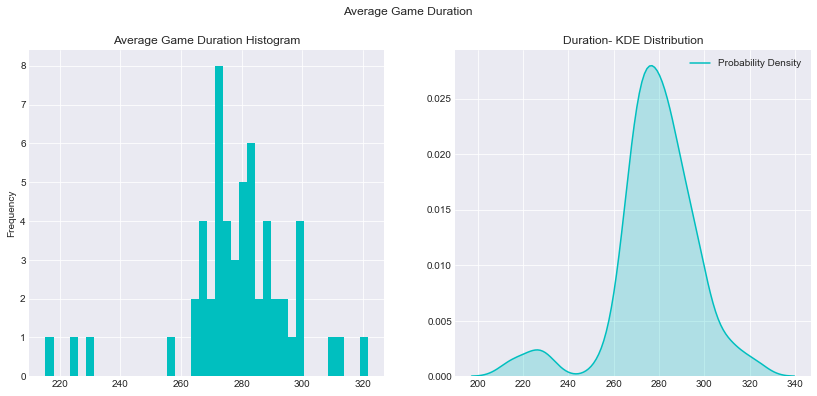

In [50]:

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import warnings 
warnings.simplefilter('ignore')
%matplotlib inline

fig, ax = plt.subplots(1, 2, figsize=(14,6))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to chart
end_info['Average_duration'].plot(kind="hist", ax=ax[0], bins=40, label="", color="c")
ax[0].set_title("Average Game Duration Histogram")
sns.kdeplot(end_info['Average_duration'], shade=True, label="Probability Density", ax=ax[1], color="c")
ax[1].set_title("Duration- KDE Distribution")
plt.suptitle("Average Game Duration")
plt.show()

<br><br>
### <a id="4.2">4.2. Average Game Score </a>
<br>

Just like calculation of mean game duration, i can calculate average game score in a same way.

In [51]:
# Sample Mean game score ->
query = 'SELECT  Avg(score) from end_table'
end_info = pd.read_sql(query, connection)
end_info


,Avg(score)
0,846.872881


In [52]:
query = 'SELECT AVG(score) as Average_Score, dt from end_table  group by dt ORDER BY ts asc' #
end_info = pd.read_sql(query, connection)
end_info.head(5)




,Average_Score,dt
0,762.666667,14/02/17
1,767.000000,16/02/17
2,501.375000,20/02/17
3,659.564677,21/02/17
4,677.422162,22/02/17


In [53]:

trace1 = go.Scatter(x =  pd.to_datetime(end_info['dt'],format='%d/%m/%y'), y = end_info['Average_Score'], name='Game Score', mode = "lines", marker = dict(color = '#598AC6'))

data = [trace1]
layout = dict(height=750, title = 'Daily Average Game Score', legend=dict(orientation="h", x=-.01, y=1), xaxis= dict(title="Datetime", ticklen= 1))
fig = dict(data = data, layout = layout)
iplot(fig)




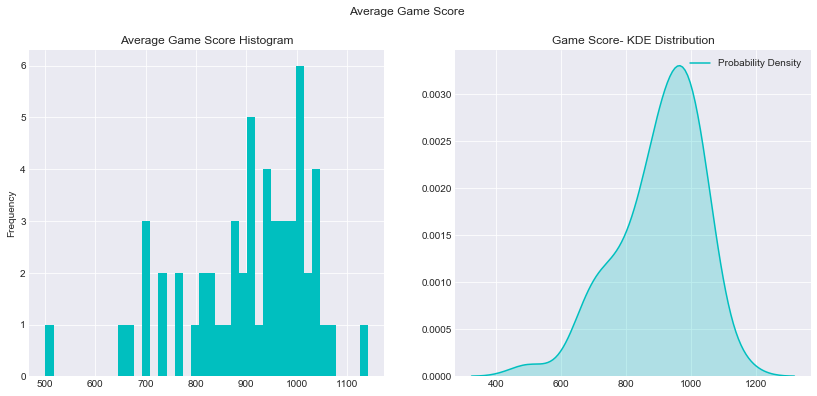

In [54]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to chart
end_info['Average_Score'].plot(kind="hist", ax=ax[0], bins=40, label="", color="c")
ax[0].set_title("Average Game Score Histogram")
sns.kdeplot(end_info['Average_Score'], shade=True, label="Probability Density", ax=ax[1], color="c")
ax[1].set_title("Game Score- KDE Distribution")
plt.suptitle("Average Game Score")
plt.show()

<br><br>
### <a id="4.3">4.3 Session per User </a>
<br>

In [55]:
# We can calculate session per user by looking Login table, because when user login the game , s_index is incremented.
#User a göre gruplayıp , s_index in maxını alman lazım
query = 'select uid,max(s_index) as max_session_num from login_table  group by uid ORDER BY ts asc' #
log_info = pd.read_sql(query, connection)
log_info.head(4)
#Now we maximum session numbers that particular user has reached.

,uid,max_session_num
0,2550,4
1,706,96
2,1067,6
3,1138,1


In [56]:
#So we can measure mean session number that cover user lifetime.
log_info["max_session_num"].mean()
#Which is 7.67 session per user.



7.6723247232472325

<br><br>
### <a id="4.4">4.4 Games per Session </a>

For finding games per session, we have to relationship between the session index and game index in users. In other words, we need max game index and max session index for that user. Keep in mind that , session and game_index  must be highly correlated due to when session number increases, this implicitly increase the game_index because users must be play the game during sessions. What would mean if they didn't play ? Consequently we must get max session index and max game index that user has.

In [57]:
query2 = 'select uid,max(game_index) as max_game_number, max(s_index) as max_session_number, max(game_index)*1.0 / max(s_index) as games_per_session from start_table group by uid ' #
start_info = pd.read_sql(query2, connection)
start_info.head(5)

,uid,max_game_number,max_session_number,games_per_session
0,1,7,3,2.333333
1,2,1,1,1.000000
2,3,7,5,1.400000
3,4,28,9,3.111111
4,5,18,3,6.000000


In [58]:
MEAN_GAME_PER_SESSION=start_info["games_per_session"].mean()
MEAN_GAME_PER_SESSION
#This number is the sample mean of games per session

2.1101583449169867

<br><br>
### <a id="4.5">4.5 Average Session Duration </a>

Until now, we already now average game duration and games per session,Hence when we multiply it with each other , we can estimate in a naive way.

Avg Game Duration * Games Per Session = Avg Session Duration.

However, we ignore the gap between install and playing game, also ignoring gap between games etc


In [59]:
AVG_SESSION_DUR=AVG_GAME_DUR * MEAN_GAME_PER_SESSION
AVG_SESSION_DUR

588.2927560041036

<br><br>
### <a id="4.6">4.6 Percentage of Users that Finished Tutorial </a>

In the Tutorial table, we already have information  of how many steps users forwarded. When they reach 8 , this means they succesfully completed the tutorial. What i did is basically find the proportion of reach the step 8 and divide it by unique user number.

In [60]:
#read a SQL Query out of your database and into a pandas dataframe
query = 'SELECT * from tutorial_table' #
tutor_info = pd.read_sql(query, connection)
tutor_info.head(5)

,index,event_id,ts,dt,uid,s_index,s_time,game_index,step
0,0,fcd7a8bd-921e-5878-8a50-1e7f88b46d50,1488007754,2017-02-25,1356,1,93,1,8
1,1,a3fb3bdc-73bd-a1b6-760c-23afbafceacf,1487946568,2017-02-24,1259,1,143,1,5
2,2,f44c7c86-2485-4d3e-8f55-a42c2855ac0d,1488043101,2017-02-25,292,1,295,1,6
3,3,c15f2770-fe2b-c78e-8064-6192fc7749dd,1487873187,2017-02-23,2742,1,27,1,4
4,4,dac609e8-fddc-3495-05f9-049abd6c0f51,1487694226,2017-02-21,112,1,175,1,7


To find maximum step number that particular user reach below query works well.

In [61]:
query = ''' 
 
select count(*) as finished_tutorial  from

(SELECT  max(step) as stepNum,uid from tutorial_table  group by uid)

where stepNum=8''' #
a = pd.read_sql(query, connection)
a



,finished_tutorial
0,2189


We already find the # of users that succesfully completed the tutorial,  now divide it by unique user number.

In [62]:
query = 'select count(*) as Total from (SELECT  count(*) from tutorial_table group by uid)' #
b = pd.read_sql(query, connection)
b
#This there is 2682 user exist in tutorial_taable

,Total
0,2642


In [63]:
PER_USER_FINISH_TUTORIAL=a['finished_tutorial'][0]/b['Total'][0]

print ("{0:.0f}%".format(PER_USER_FINISH_TUTORIAL * 100), "of User has succesfully completed the Tutorial")

83% of User has succesfully completed the Tutorial
